# 1. Neteja i anàlisi

In [126]:
import pandas as pd
import re

Carregam el dataset i feim les primeres visualitzacions de dades i informació

In [127]:
df = pd.read_csv("job_descriptions.csv", encoding='utf-8')
df.head()

,Job Id,Experience,Qualifications,Salary Range,location,Country,latitude,longitude,Work Type,Company Size,...,Contact,Job Title,Role,Job Portal,Job Description,Benefits,skills,Responsibilities,Company,Company Profile
0,1089843540111562,5 to 15 Years,M.Tech,$59K-$99K,Douglas,Isle of Man,54.2361,-4.5481,Intern,26801,...,001-381-930-7517x737,Digital Marketing Specialist,Social Media Manager,Snagajob,Social Media Managers oversee an organizations...,"{'Flexible Spending Accounts (FSAs), Relocatio...","Social media platforms (e.g., Facebook, Twitte...","Manage and grow social media accounts, create ...",Icahn Enterprises,"{""Sector"":""Diversified"",""Industry"":""Diversifie..."
1,398454096642776,2 to 12 Years,BCA,$56K-$116K,Ashgabat,Turkmenistan,38.9697,59.5563,Intern,100340,...,461-509-4216,Web Developer,Frontend Web Developer,Idealist,Frontend Web Developers design and implement u...,"{'Health Insurance, Retirement Plans, Paid Tim...","HTML, CSS, JavaScript Frontend frameworks (e.g...","Design and code user interfaces for websites, ...",PNC Financial Services Group,"{""Sector"":""Financial Services"",""Industry"":""Com..."
2,481640072963533,0 to 12 Years,PhD,$61K-$104K,Macao,"Macao SAR, China",22.1987,113.5439,Temporary,84525,...,9687619505,Operations Manager,Quality Control Manager,Jobs2Careers,Quality Control Managers establish and enforce...,"{'Legal Assistance, Bonuses and Incentive Prog...",Quality control processes and methodologies St...,Establish and enforce quality control standard...,United Services Automobile Assn.,"{""Sector"":""Insurance"",""Industry"":""Insurance: P..."
3,688192671473044,4 to 11 Years,PhD,$65K-$91K,Porto-Novo,Benin,9.3077,2.3158,Full-Time,129896,...,+1-820-643-5431x47576,Network Engineer,Wireless Network Engineer,FlexJobs,"Wireless Network Engineers design, implement, ...","{'Transportation Benefits, Professional Develo...",Wireless network design and architecture Wi-Fi...,"Design, configure, and optimize wireless netwo...",Hess,"{""Sector"":""Energy"",""Industry"":""Mining, Crude-O..."
4,117057806156508,1 to 12 Years,MBA,$64K-$87K,Santiago,Chile,-35.6751,-71.5429,Intern,53944,...,343.975.4702x9340,Event Manager,Conference Manager,Jobs2Careers,A Conference Manager coordinates and manages c...,"{'Flexible Spending Accounts (FSAs), Relocatio...",Event planning Conference logistics Budget man...,Specialize in conference and convention planni...,Cairn Energy,"{""Sector"":""Energy"",""Industry"":""Energy - Oil & ..."


Eliminam la columna Job Id ja que no aporta informació al conjunt de dades

In [128]:
df = df.drop(columns=['Job Id'])

In [129]:
print(f"Files: {df.shape[0]}, Columnes: {df.shape[1]}")

Files: 1615940, Columnes: 22


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1615940 entries, 0 to 1615939
Data columns (total 22 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Experience        1615940 non-null  object 
 1   Qualifications    1615940 non-null  object 
 2   Salary Range      1615940 non-null  object 
 3   location          1615940 non-null  object 
 4   Country           1615940 non-null  object 
 5   latitude          1615940 non-null  float64
 6   longitude         1615940 non-null  float64
 7   Work Type         1615940 non-null  object 
 8   Company Size      1615940 non-null  int64  
 9   Job Posting Date  1615940 non-null  object 
 10  Preference        1615940 non-null  object 
 11  Contact Person    1615940 non-null  object 
 12  Contact           1615940 non-null  object 
 13  Job Title         1615940 non-null  object 
 14  Role              1615940 non-null  object 
 15  Job Portal        1615940 non-null  object 
 16  

Com tenim poques línies amb valors buits en comparació al tamany del dataset, eliminarem aquestes files i comprovam que no tenguem duplicats

In [131]:
df.duplicated().sum()

0

In [132]:
df = df.dropna()

Miram els possibles valors d'algunes de les variables categòriques per veure possible tractament que haguem de fer

In [133]:
df['Work Type'].value_counts()

Work Type
Part-Time    322941
Temporary    322341
Intern       322033
Contract     322016
Full-Time    321131
Name: count, dtype: int64

In [134]:
df['Job Title'].value_counts()

Job Title
UX/UI Designer                  48376
Digital Marketing Specialist    27881
Software Engineer               27537
Network Engineer                24307
Software Tester                 20871
                                ...  
QA Engineer                      3431
Personal Assistant               3429
Procurement Coordinator          3415
Key Account Manager              3394
Inventory Analyst                3335
Name: count, Length: 147, dtype: int64

In [135]:
df['skills'].value_counts()

skills
Interaction design principles User behavior and psychology Wireframing and prototyping tools Animation and micro-interaction design Collaborative design processes                                                                                                               20508
Network management Troubleshooting Network security IT certifications (e.g., CCNA)                                                                                                                                                                                               17411
UI design principles and best practices Graphic design tools (e.g., Adobe Photoshop, Illustrator) Typography and color theory Visual design and layout Responsive design                                                                                                         13983
Social media platforms (e.g., Facebook, Twitter, Instagram) Content creation and scheduling Social media analytics and insights Community engagement Paid so

In [136]:
df['Benefits'].value_counts()

Benefits
{'Childcare Assistance, Paid Time Off (PTO), Relocation Assistance, Flexible Work Arrangements, Professional Development'}                                161370
{'Transportation Benefits, Professional Development, Bonuses and Incentive Programs, Profit-Sharing, Employee Discounts'}                                 161291
{'Tuition Reimbursement, Stock Options or Equity Grants, Parental Leave, Wellness Programs, Childcare Assistance'}                                        161130
{'Legal Assistance, Bonuses and Incentive Programs, Wellness Programs, Employee Discounts, Retirement Plans'}                                             161010
{'Casual Dress Code, Social and Recreational Activities, Employee Referral Programs, Health and Wellness Facilities, Life and Disability Insurance'}      160989
{'Employee Referral Programs, Financial Counseling, Health and Wellness Facilities, Casual Dress Code, Flexible Spending Accounts (FSAs)'}                160984
{'Employee Assistance Pro

In [137]:
df['Responsibilities'].value_counts()

Responsibilities
Work on interaction design, defining how users interact with digital products and ensuring a seamless user journey. Create wireframes and prototypes to illustrate interactions. Collaborate with developers to implement interaction designs.    20508
Manage and maintain computer networks, troubleshoot network issues, and ensure network availability and performance. Implement network security measures and policies. Monitor network traffic and optimize performance.                          17411
Create visually appealing user interfaces (UI) that align with brand aesthetics and enhance user engagement. Design interface elements and interactive components. Ensure UI consistency across digital platforms.                                13983
Manage and grow social media accounts, create engaging content, and interact with the online community. Develop social media content calendars and strategies. Monitor social media trends and engagement metrics.                             

Com podem observar, skills, Benefits i Responsibilities són llistes de diversos atributs separats per comes

Ara veim que tant la columna Experience com Salary contenten un rang de valors numèrics però com a cadena de text. Manipularem aquest text per obtenir els valors mínims i màxims del rang i crear columnes numèriques amb aquesta informació.

In [138]:
df['min_Experience'] = df['Experience'].str.extract(r'^(\d+)\s+to\s+\d+\s+Years$')[0].astype(int)
df['max_Experience'] = df['Experience'].str.extract(r'^\d+\s+to\s+(\d+)\s+Years$')[0].astype(int)

In [139]:
df[['Experience', 'min_Experience', 'max_Experience']]

,Experience,min_Experience,max_Experience
0,5 to 15 Years,5,15
1,2 to 12 Years,2,12
2,0 to 12 Years,0,12
3,4 to 11 Years,4,11
4,1 to 12 Years,1,12
...,...,...,...
1615935,0 to 12 Years,0,12
1615936,2 to 14 Years,2,14
1615937,4 to 15 Years,4,15
1615938,5 to 15 Years,5,15


Comprobam la distribució de la nova variable numèrica, que podem observar que no té valors extrems

In [140]:
df["min_Experience"].describe()

count    1.610462e+06
mean     2.501967e+00
std      1.707813e+00
min      0.000000e+00
25%      1.000000e+00
50%      3.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: min_Experience, dtype: float64

In [141]:
df["max_Experience"].describe()

count    1.610462e+06
mean     1.149798e+01
std      2.291943e+00
min      8.000000e+00
25%      9.000000e+00
50%      1.100000e+01
75%      1.300000e+01
max      1.500000e+01
Name: max_Experience, dtype: float64

In [142]:
# Eliminam la columna original
df = df.drop(columns=['Experience'])

In [143]:
df['min_Salary'] = df['Salary Range'].str.extract(r'^\$(\d{2,})K')[0].astype(int) * 1000
df['max_Salary'] = df['Salary Range'].str.extract(r'\$(\d{2,})K$')[0].astype(int) * 1000

In [144]:
df[['Salary Range', 'min_Salary', 'max_Salary']]

,Salary Range,min_Salary,max_Salary
0,$59K-$99K,59000,99000
1,$56K-$116K,56000,116000
2,$61K-$104K,61000,104000
3,$65K-$91K,65000,91000
4,$64K-$87K,64000,87000
...,...,...,...
1615935,$64K-$114K,64000,114000
1615936,$62K-$130K,62000,130000
1615937,$60K-$96K,60000,96000
1615938,$65K-$103K,65000,103000


In [145]:
df["min_Salary"].describe()

count    1.610462e+06
mean     6.000329e+04
std      3.163946e+03
min      5.500000e+04
25%      5.700000e+04
50%      6.000000e+04
75%      6.300000e+04
max      6.500000e+04
Name: min_Salary, dtype: float64

In [146]:
df["max_Salary"].describe()

count    1.610462e+06
mean     1.049783e+05
std      1.471730e+04
min      8.000000e+04
25%      9.200000e+04
50%      1.050000e+05
75%      1.180000e+05
max      1.300000e+05
Name: max_Salary, dtype: float64

In [147]:
# Eliminem la columna original
df = df.drop(columns=['Salary Range'])

In [148]:
df.head()

,Qualifications,location,Country,latitude,longitude,Work Type,Company Size,Job Posting Date,Preference,Contact Person,...,Job Description,Benefits,skills,Responsibilities,Company,Company Profile,min_Experience,max_Experience,min_Salary,max_Salary
0,M.Tech,Douglas,Isle of Man,54.2361,-4.5481,Intern,26801,2022-04-24,Female,Brandon Cunningham,...,Social Media Managers oversee an organizations...,"{'Flexible Spending Accounts (FSAs), Relocatio...","Social media platforms (e.g., Facebook, Twitte...","Manage and grow social media accounts, create ...",Icahn Enterprises,"{""Sector"":""Diversified"",""Industry"":""Diversifie...",5,15,59000,99000
1,BCA,Ashgabat,Turkmenistan,38.9697,59.5563,Intern,100340,2022-12-19,Female,Francisco Larsen,...,Frontend Web Developers design and implement u...,"{'Health Insurance, Retirement Plans, Paid Tim...","HTML, CSS, JavaScript Frontend frameworks (e.g...","Design and code user interfaces for websites, ...",PNC Financial Services Group,"{""Sector"":""Financial Services"",""Industry"":""Com...",2,12,56000,116000
2,PhD,Macao,"Macao SAR, China",22.1987,113.5439,Temporary,84525,2022-09-14,Male,Gary Gibson,...,Quality Control Managers establish and enforce...,"{'Legal Assistance, Bonuses and Incentive Prog...",Quality control processes and methodologies St...,Establish and enforce quality control standard...,United Services Automobile Assn.,"{""Sector"":""Insurance"",""Industry"":""Insurance: P...",0,12,61000,104000
3,PhD,Porto-Novo,Benin,9.3077,2.3158,Full-Time,129896,2023-02-25,Female,Joy Lucero,...,"Wireless Network Engineers design, implement, ...","{'Transportation Benefits, Professional Develo...",Wireless network design and architecture Wi-Fi...,"Design, configure, and optimize wireless netwo...",Hess,"{""Sector"":""Energy"",""Industry"":""Mining, Crude-O...",4,11,65000,91000
4,MBA,Santiago,Chile,-35.6751,-71.5429,Intern,53944,2022-10-11,Female,Julie Johnson,...,A Conference Manager coordinates and manages c...,"{'Flexible Spending Accounts (FSAs), Relocatio...",Event planning Conference logistics Budget man...,Specialize in conference and convention planni...,Cairn Energy,"{""Sector"":""Energy"",""Industry"":""Energy - Oil & ...",1,12,64000,87000


Per al pais, comprovarem si hi ha diferències semàntiques que provinguin d'errors d'escriptura, o per diferents formats utilitzats en diferents pàgines (com EUA i EEUU), i les substituirem per tenir el mateix format en totes.

In [149]:
from rapidfuzz import fuzz
from itertools import combinations

# Obtenim la llista de valors únics de 'Country'
countries = df['Country'].dropna().unique()

# Mirem totes les combinacions possibles de parelles
for c1, c2 in combinations(countries, 2):
    similarity = fuzz.ratio(c1.lower(), c2.lower())  # insensible a majúscules
    if similarity > 70:  # pots ajustar el llindar segons vulguis
        print(f"'{c1}' és similar a '{c2}' ({similarity}%)")

'Gambia' és similar a 'Cambodia' (71.42857142857143%)
'Gambia' és similar a 'Zambia' (83.33333333333334%)
'Gambia' és similar a 'Namibia' (76.92307692307692%)
'Democratic Republic Of Congo' és similar a 'Republic Of Congo' (75.55555555555556%)
'Paraguay' és similar a 'Nicaragua' (70.58823529411764%)
'Nigeria' és similar a 'Liberia' (71.42857142857143%)
'Nigeria' és similar a 'Niger' (83.33333333333334%)
'Nigeria' és similar a 'Georgia' (71.42857142857143%)
'Nigeria' és similar a 'Algeria' (71.42857142857143%)
'Australia' és similar a 'Austria' (87.5%)
'Oman' és similar a 'Romania' (72.72727272727273%)
'Malta' és similar a 'Malawi' (72.72727272727273%)
'Cambodia' és similar a 'Zambia' (71.42857142857143%)
'Armenia' és similar a 'Romania' (71.42857142857143%)
'Armenia' és similar a 'Argentina' (75.0%)
'India' és similar a 'Indonesia' (71.42857142857143%)
'Somalia' és similar a 'Mali' (72.72727272727273%)
'Somalia' és similar a 'Romania' (71.42857142857143%)
'Pakistan' és similar a 'Tajik

Amb un 70% de similitut pareix que no tenguem paisos mal escrits ni errors tipogràfics a corregir. Per si les mosques, definirem paisos que s'han de corregir ja que és comú trobar-los en diferents formats a diferents fonts

In [150]:
correccions_paisos = {
    'Democratic Republic Of Congo': 'Democratic Republic of the Congo',
    'DR Congo': 'Democratic Republic of the Congo',
    'Congo - Kinshasa': 'Democratic Republic of the Congo',
    'Republic Of Congo': 'Republic of the Congo',
    'Congo - Brazzaville': 'Republic of the Congo',
    'USA': 'United States',
    'U.S.A.': 'United States',
    'United States of America': 'United States',
    'UK': 'United Kingdom',
    'U.K.': 'United Kingdom',
    'South Korea': 'Korea, South',
    'Russia': 'Russian Federation',
    'Ivory Coast': "Côte d'Ivoire",
}

df['Country'] = df['Country'].replace(correccions_paisos)

Guardam el dataset netejat a un nou arxiu csv

In [151]:
df.to_csv("job_offers_clean.csv", index=False)

In [152]:
df = pd.read_csv("job_offers_clean.csv")

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610462 entries, 0 to 1610461
Data columns (total 24 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Qualifications    1610462 non-null  object 
 1   location          1610462 non-null  object 
 2   Country           1610462 non-null  object 
 3   latitude          1610462 non-null  float64
 4   longitude         1610462 non-null  float64
 5   Work Type         1610462 non-null  object 
 6   Company Size      1610462 non-null  int64  
 7   Job Posting Date  1610462 non-null  object 
 8   Preference        1610462 non-null  object 
 9   Contact Person    1610462 non-null  object 
 10  Contact           1610462 non-null  object 
 11  Job Title         1610462 non-null  object 
 12  Role              1610462 non-null  object 
 13  Job Portal        1610462 non-null  object 
 14  Job Description   1610462 non-null  object 
 15  Benefits          1610462 non-null  object 
 16  

Per a l'algoritme no supervisat, aplicarem un algoritme KMeans, el qual necessita de variables numèriques. Agafarem les variables numèriques (excepte per les coordenades de l'empresa) i l'etiqueta Work Type, que té 5 possibles valors i compararem el resultat del clustering amb l'etiqueta Work Type per si hagués alguna relació. L'objectiu és estudiar si els rangs salarials oferits i l'experiència requerida són informació suficient per diferenciar si l'oferta és a temps complet o parcial, si amb contracte indefinit o temporal. O en cas contrari, si aquestes variables no són suficients per diferenciar els diferents règims de contractació

In [154]:
df_cleaned = df[["Company Size", "min_Experience", "max_Experience", "min_Salary", "max_Salary", "Work Type"]]
df_cleaned

,Company Size,min_Experience,max_Experience,min_Salary,max_Salary,Work Type
0,26801,5,15,59000,99000,Intern
1,100340,2,12,56000,116000,Intern
2,84525,0,12,61000,104000,Temporary
3,129896,4,11,65000,91000,Full-Time
4,53944,1,12,64000,87000,Intern
...,...,...,...,...,...,...
1610457,18281,0,12,64000,114000,Full-Time
1610458,63621,2,14,62000,130000,Intern
1610459,114287,4,15,60000,96000,Part-Time
1610460,45009,5,15,65000,103000,Full-Time


Separarem l'etiqueta de la resta de dades, ja que és un algoritme no supervisat, la guardarem a un altre dataframe per comparar al final i veure si tenim aquesta relacio o no

In [155]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Separam variables numèriques de l'etiqueta
X = df_cleaned.drop(columns=['Work Type']) 
y = df_cleaned['Work Type'] 

# Com el conjunt de dades és molt gran, amb train_test_split afagarem un percentatge petit del dataset mantenint la proporció original de les etiquetes, això facilitarà la visualització
X_train, X_sample, y_train, y_sample = train_test_split(
    X, y, test_size=0.05, random_state=42, stratify=y
)

df_for_clustering = X_sample.copy()
y_sample_for_validation = y_sample.copy()

In [156]:
# Escalam les variables numèriques

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_for_clustering)
df_scaled = pd.DataFrame(X_scaled, columns=df_for_clustering.columns, index=df_for_clustering.index)

Per tenir una primera idea de com poden ser els clusters, mirarem per a quin nombre de clusters s'adapta millor el nostre conjunt de dades


Calculant la inèrcia per a diferents nombres de clústers (K)...
K=2: Inèrcia=340360.10
K=3: Inèrcia=304425.94
K=4: Inèrcia=274360.27
K=5: Inèrcia=253597.84
K=6: Inèrcia=234669.19
K=7: Inèrcia=219930.44
K=8: Inèrcia=205982.12
K=9: Inèrcia=193879.27
K=10: Inèrcia=181667.68
K=11: Inèrcia=174768.18
K=12: Inèrcia=167382.45
K=13: Inèrcia=160454.80
K=14: Inèrcia=153345.79


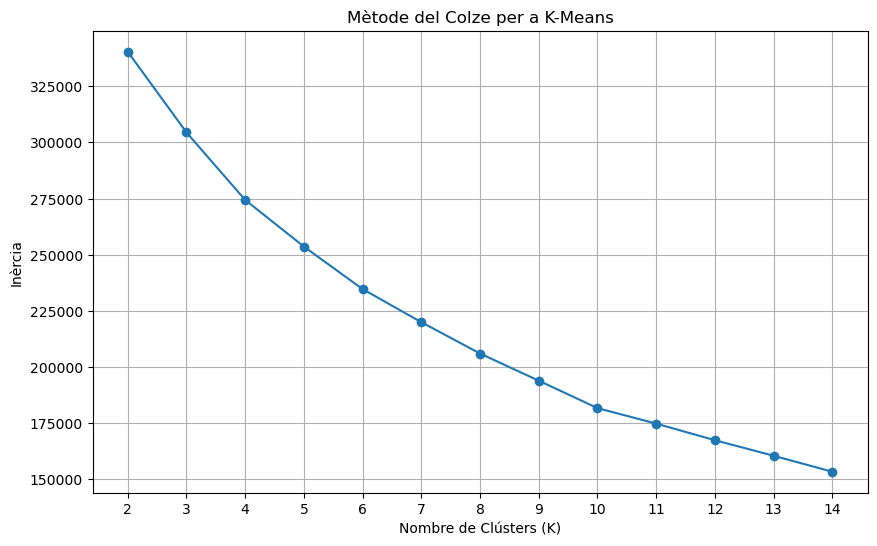

In [157]:
# Rang de K's a provar
inertia = []
K_range = range(2, 15)

print("\nCalculant la inèrcia per a diferents nombres de clústers (K)...")
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) 
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)
    print(f"K={k}: Inèrcia={kmeans.inertia_:.2f}")

# Visualitzam tots els casos
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Nombre de Clústers (K)')
plt.ylabel('Inèrcia')
plt.title('Mètode del Colze per a K-Means')
plt.xticks(K_range)
plt.grid(True)
plt.show()

Amb el mètode del colze hauríem de cercar on passam de tenir una baixada abrupta a una zona més horitzontal, fent aquest "colze" a la gràfica. Aquest a priori seria el nombre òptim de clusters per a les nostres dades. Però com podem observar, la corba és bastant uniforme i no es veu cap colze, per tant ja podem preveure que aquestes dades no seran suficients per diferenciar grups entre sí

In [158]:
# Com la variable Work Type té 5 possibles valors, farem KMeans amb 5 clusters
k_optim_numeric = 5

print(f"\nRealitzant el clustering amb K = {k_optim_numeric}")
kmeans_model = KMeans(n_clusters=k_optim_numeric, random_state=42, n_init=10)
clusters_numeric = kmeans_model.fit_predict(df_scaled)

# Afegim les assignacions de clúster al DataFrame de la mostra
df_scaled['cluster'] = clusters_numeric


Realitzant el clustering amb K = 5


Un cop hem acabat de clusteritzar, aplicarem PCA per reduir el conjunt de dades a 2 dimensions per a poder visualitzar els grups

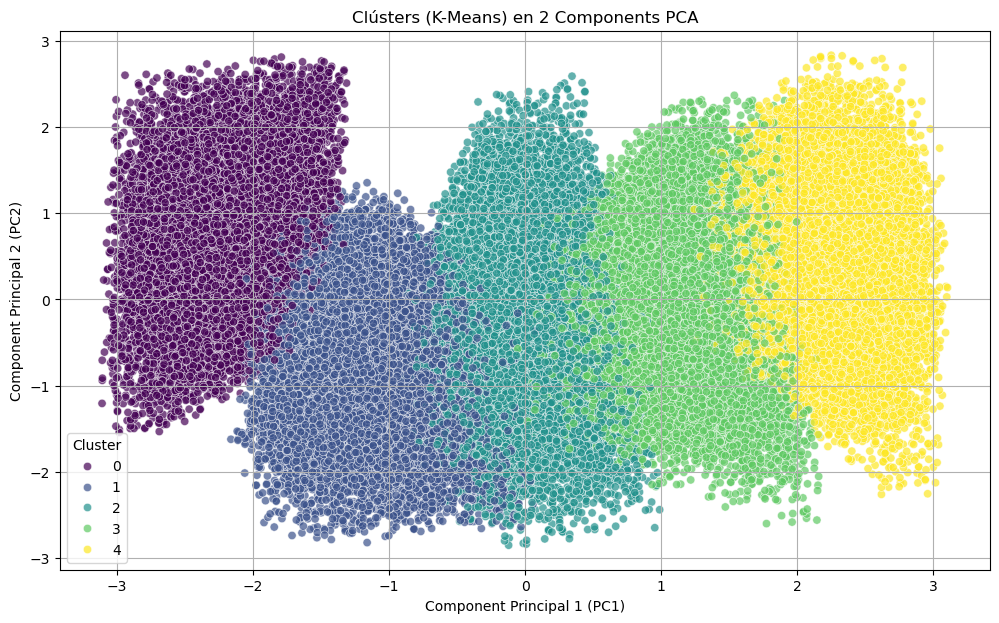

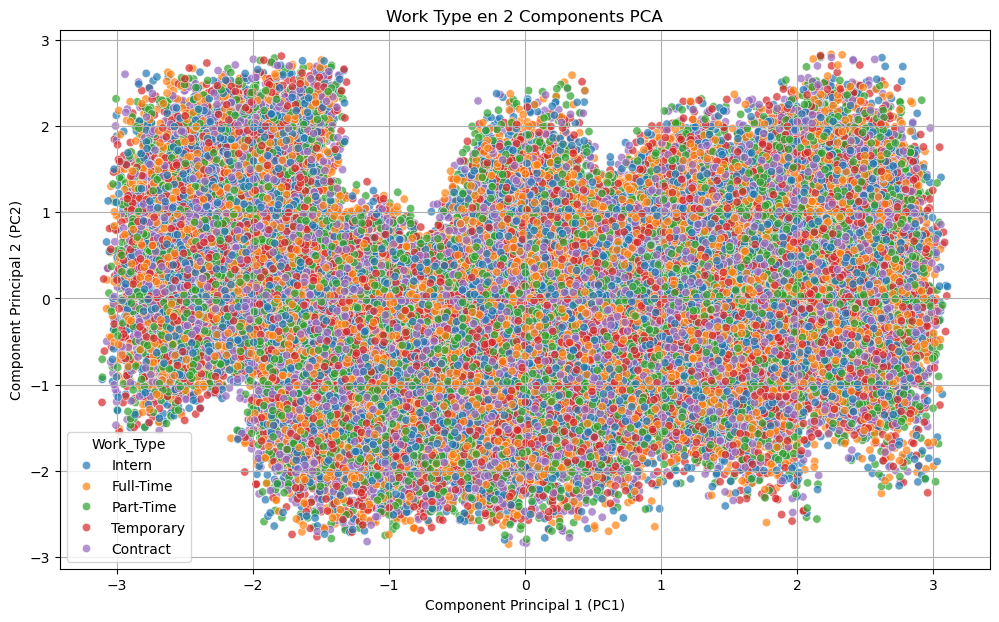

In [159]:
from sklearn.decomposition import PCA

# Reducció de Dimensionalitat amb PCA
pca = PCA(n_components=2) # Reduïm a 2 components per a la visualització 2D
components = pca.fit_transform(df_scaled)

# Crear un DataFrame per a la visualització
df_plot = pd.DataFrame(data=components, columns=['PC1', 'PC2'])
df_plot['Cluster'] = clusters_numeric
df_plot['Work_Type'] = y_sample_for_validation.reset_index(drop=True) 

# Visualització dels Clusters (color segons el clúster assignat)
plt.figure(figsize=(12, 7))
sns.scatterplot(
    x='PC1', y='PC2',
    hue='Cluster', # Color segons el clúster
    palette='viridis', 
    data=df_plot,
    legend='full',
    alpha=0.7
)
plt.title('Clústers (K-Means) en 2 Components PCA')
plt.xlabel('Component Principal 1 (PC1)')
plt.ylabel('Component Principal 2 (PC2)')
plt.grid(True)
plt.show()

# Visualització dels mateixos punts (color segons Work Type original)
plt.figure(figsize=(12, 7))
sns.scatterplot(
    x='PC1', y='PC2',
    hue='Work_Type', # Color segons la variable Work Type
    palette='tab10', 
    data=df_plot,
    legend='full',
    alpha=0.7
)
plt.title('Work Type en 2 Components PCA')
plt.xlabel('Component Principal 1 (PC1)')
plt.ylabel('Component Principal 2 (PC2)')
plt.grid(True)
plt.show()

Com podem observar, agafant el 5% de les dades, ja tenim milers de punts, la qual cosa dificulta la visualització. També podem veure que a la primera gràfica tenim ben diferenciats per colors els clusters resultants de l'algoritme. Però quan a aquests punts els hi tornam el seu valor original de Work Type, no tenim els colors diferenciats per grups, sinó que estan mesclats.
Per tant podem concluir que el rang salarial oferit, l'experiència requerida i el tamany de l'empresa no són dades suficients per predir el tipus de contracte que ens oferiran.

Aquesta comparació es podria fer amb altres categories, s'ha utilitzat Work Type perquè té 5 possibles valors i pot ser una informació important si ens interessa saber per exemple el rang salarial mitjà oferit en contractes temporals, per exemple. Amb altres variables es dificultava aquest anàlisi ja que teninen molts possibles valors o perquè no aportaven informació tan útil com podria ser el país de l'oferta o el nom de l'empresa.

Normalment els algoritmes no supervisats es basen en densitat de punts o distància entre aquests, de manera que són útils quan es treballa amb variables numèriques, però aquestes distàncies no tenen sentit amb variables categòriques (no té sentit fer la resta Espanya-França per calcular-ne la distància). Hi ha alguns algoritmes com KPrototypes que sí que admeten dades categòriques, però vista la naturalesa del nostre conjunt de dades, hi ha algunes variables amb molt de text, o que dins el valor de la variable hi ha una llista de diferents valors. Aquestes dades implicarien un preprocessat massa complex i inclús la codificació d'aquestes variables categòriques fent que tenguem després moltíssimes columnes i per tant una dimensionalitat massa gran que influiria negativament en el rendiment del clustering i també en el seu resultat.